In [ ]:
import pandas as pd
import os
import numpy as np

control=[]
adhd=[]
for i in range(19):
    b=[]
    for j in os.listdir(f'./drive/MyDrive/psd_corr/ADHD/{i}'):
        b.append(pd.read_csv(f'./drive/MyDrive/psd_corr/ADHD/{i}/'+j,index_col='Unnamed: 0').to_numpy())
    adhd.append(b)
    
for i in range(19):
    b=[]    
    for j in os.listdir(f'./drive/MyDrive/psd_corr/Control/{i}'):
        b.append(pd.read_csv(f'./drive/MyDrive/psd_corr/Control/{i}/'+j,index_col='Unnamed: 0').to_numpy())
    control.append(b)
    
control= np.array(control).transpose(1,0,2,3)
adhd=np.array(adhd).transpose(1,0,2,3)

x=np.append(adhd,control,axis=0)
y=np.array([1]*61+[0]*60)

In [5]:
def crop(dimension, start, end):
    # Crops (or slices) a Tensor on a given dimension from start to end
    # example : to crop tensor x[:, :, 5:10]
    # call slice(2, 5, 10) as you want to crop on the second dimension
    def func(x):
        if dimension == 0:
            return x[start: end]
        if dimension == 1:
            return x[:, start: end]
        if dimension == 2:
            return x[:, :, start: end]
        if dimension == 3:
            return x[:, :, :, start: end]
        if dimension == 4:
            return x[:, :, :, :, start: end]
    return Lambda(func)
import math
def slice_model(model_input,unit,row_num,col_num,term):
  remain=math.ceil(unit/2)
  return [crop(3,col_num-(j+unit),col_num-j)(crop(2,row_num-(i+unit),row_num-i)(model_input)) for i in range(0,row_num-unit+1,term) for j in range(0,col_num-unit+1,term)]

In [18]:
import sys
import sys
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, GlobalMaxPooling3D,Lambda,concatenate,Conv3D, MaxPooling3D,GlobalAveragePooling3D
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os



def mk_model(filepath=None):
    
    FILTER_SIZE=3
    NUM_FILTERS=16
    INPUT_SIZE=19
    MAXPOOL_SIZE=2
    BATCH_SIZE=3
    STEPS_PER_EPOCH=48//BATCH_SIZE
    EPOCHS=1000
    densors=[]
    model_input=Input(shape=(19,INPUT_SIZE,INPUT_SIZE,1))
    print(model_input.shape)
    for idx in slice_model(model_input,3,19,19,2):
            model_output=Conv3D(NUM_FILTERS, (FILTER_SIZE,FILTER_SIZE,FILTER_SIZE),activation='relu')(idx)
            model_output=Dropout(0.5)(model_output)                        
            model_output=GlobalMaxPooling3D()(model_output)
            densors.append(model_output)

    model_output=concatenate(densors)
    model_output=Dense(units=512,activation='relu')(model_output)
    model_output=Dense(units=512,activation='relu')(model_output)
    model_output=Dense(units=512,activation='relu',kernel_regularizer=l1(0.01))(model_output)


    model_output=Dense(units=1,activation='sigmoid')(model_output)
    model = Model(inputs = model_input, outputs = model_output)
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    
    return model




(None, 19, 19, 19, 1)
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_2969 (Lambda)            (None, 19, 3, 19, 1) 0           input_22[0][0]                   
__________________________________________________________________________________________________
lambda_2971 (Lambda)            (None, 19, 3, 19, 1) 0           input_22[0][0]                   
__________________________________________________________________________________________________
lambda_2973 (Lambda)            (None, 19, 3, 19, 1) 0           input_22[0][0]                   
_____________________________________________________________________

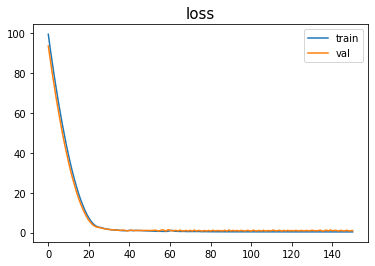

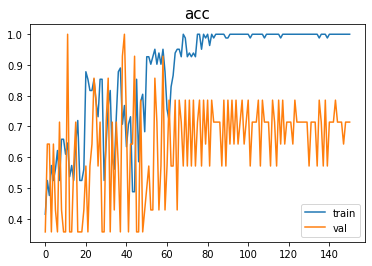

1/1 [==============================] - 0s 33ms/step - loss: 0.7688 - accuracy: 0.7857
(None, 19, 19, 19, 1)
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3131 (Lambda)            (None, 19, 3, 19, 1) 0           input_23[0][0]                   
__________________________________________________________________________________________________
lambda_3133 (Lambda)            (None, 19, 3, 19, 1) 0           input_23[0][0]                   
__________________________________________________________________________________________________
lambda_3135 (Lambda)            (None, 19, 3, 19, 1) 0           input_23[0][0]   

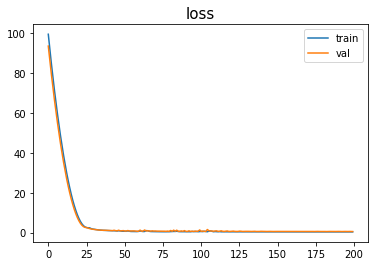

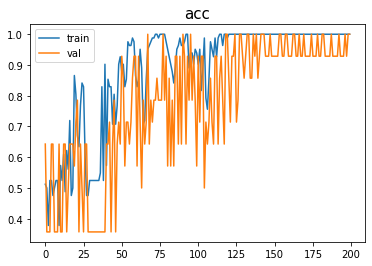

1/1 [==============================] - 0s 34ms/step - loss: 0.5453 - accuracy: 1.0000
(None, 19, 19, 19, 1)
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3293 (Lambda)            (None, 19, 3, 19, 1) 0           input_24[0][0]                   
__________________________________________________________________________________________________
lambda_3295 (Lambda)            (None, 19, 3, 19, 1) 0           input_24[0][0]                   
__________________________________________________________________________________________________
lambda_3297 (Lambda)            (None, 19, 3, 19, 1) 0           input_24[0][0]   

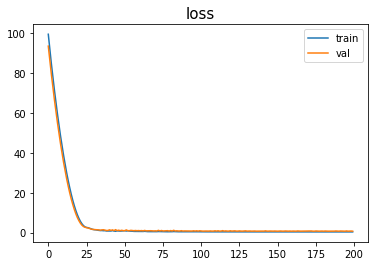

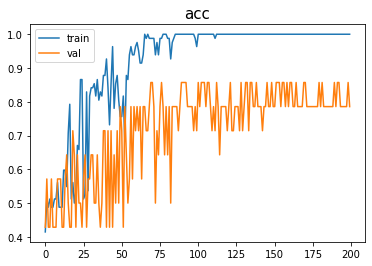

1/1 [==============================] - 0s 31ms/step - loss: 0.7113 - accuracy: 0.7857
(None, 19, 19, 19, 1)
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3455 (Lambda)            (None, 19, 3, 19, 1) 0           input_25[0][0]                   
__________________________________________________________________________________________________
lambda_3457 (Lambda)            (None, 19, 3, 19, 1) 0           input_25[0][0]                   
__________________________________________________________________________________________________
lambda_3459 (Lambda)            (None, 19, 3, 19, 1) 0           input_25[0][0]   

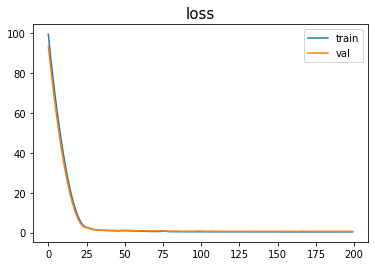

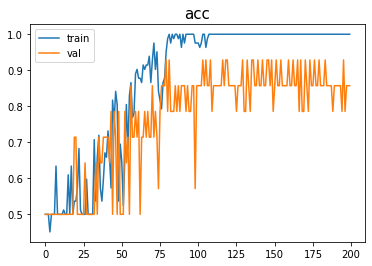

1/1 [==============================] - 0s 30ms/step - loss: 0.5820 - accuracy: 0.9286
(None, 19, 19, 19, 1)
Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3617 (Lambda)            (None, 19, 3, 19, 1) 0           input_26[0][0]                   
__________________________________________________________________________________________________
lambda_3619 (Lambda)            (None, 19, 3, 19, 1) 0           input_26[0][0]                   
__________________________________________________________________________________________________
lambda_3621 (Lambda)            (None, 19, 3, 19, 1) 0           input_26[0][0]   

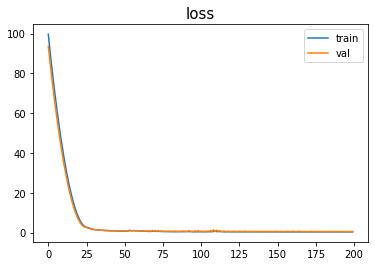

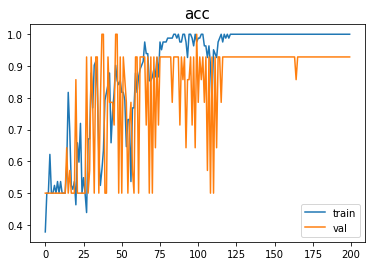

1/1 [==============================] - 0s 32ms/step - loss: 0.5235 - accuracy: 0.9286
(None, 19, 19, 19, 1)
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3779 (Lambda)            (None, 19, 3, 19, 1) 0           input_27[0][0]                   
__________________________________________________________________________________________________
lambda_3781 (Lambda)            (None, 19, 3, 19, 1) 0           input_27[0][0]                   
__________________________________________________________________________________________________
lambda_3783 (Lambda)            (None, 19, 3, 19, 1) 0           input_27[0][0]   

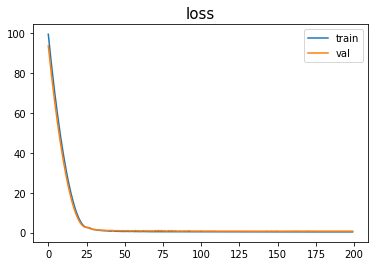

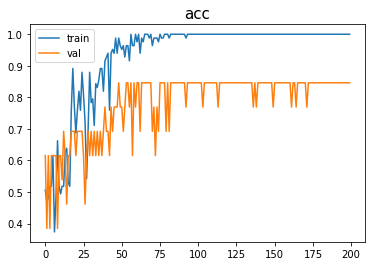

1/1 [==============================] - 0s 31ms/step - loss: 0.7006 - accuracy: 0.8462
(None, 19, 19, 19, 1)
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 19, 19, 19,  0                                            
__________________________________________________________________________________________________
lambda_3941 (Lambda)            (None, 19, 3, 19, 1) 0           input_28[0][0]                   
__________________________________________________________________________________________________
lambda_3943 (Lambda)            (None, 19, 3, 19, 1) 0           input_28[0][0]                   
__________________________________________________________________________________________________
lambda_3945 (Lambda)            (None, 19, 3, 19, 1) 0           input_28[0][0]   

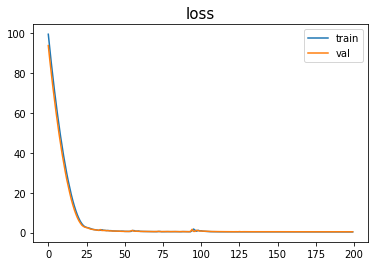

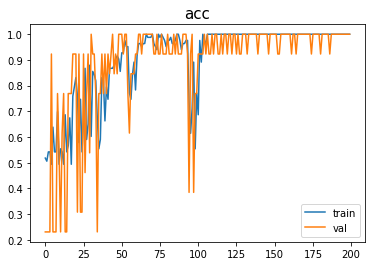

1/1 [==============================] - 0s 33ms/step - loss: 0.4114 - accuracy: 1.0000


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam



x_tra,x_test,y_tra,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=128)

kf=KFold(7,True )
train_score=[]
test_score=[]
val_score=[]
test_list=[]

idx=0

val_list=[]

for train_index, test_index in kf.split(x_tra):
    callback_list = [
    EarlyStopping( #성능 향상이 멈추면 훈련을 중지
    monitor='val_loss',  #모델 검증 정확도를 모니터링
    patience=50        #1 에포크 보다 더 길게(즉, 2에포크 동안 정확도가 향상되지 않으면 훈련 중지
),
    ModelCheckpoint( #에포크마다 현재 가중치를 저장
    filepath=f'./mod{idx}.h5', #모델 파일 경로
    monitor='val_loss',  # val_loss 가 좋아지지 않으면 모델 파일을 덮어쓰지 않음.
    save_best_only=True,
    mode='auto',
    verbose=1
)
]
    x_train,x_val=x_tra[train_index],x_tra[test_index]
    y_train,y_val=y_tra[train_index],y_tra[test_index]
    
    #with strategy.scope():
    model=mk_model()
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    hist=model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val),batch_size=36,callbacks=callback_list)
    
    
    plt.plot(hist.history['loss'],label='train'+str(idx))
    plt.plot(hist.history['val_loss'],label='train'+str(idx))
    plt.title('loss',fontsize=15)
    plt.legend(['train','val'])
    plt.show()
    plt.plot(hist.history['accuracy'],label='train'+str(idx))
    plt.plot(hist.history['val_accuracy'],label='train'+str(idx))
    plt.legend(['train','val'])
    plt.title('acc',fontsize=15)
    plt.show()
    model=load_model(f'./mod{idx}.h5')
    
    train_score.append(model.evaluate(x_train,y_train))
    test_score.append(model.evaluate(x_test,y_test))
    val_score.append(model.evaluate(x_val,y_val))
    idx+=1



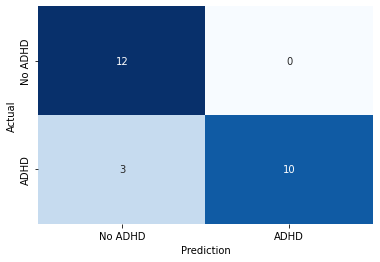

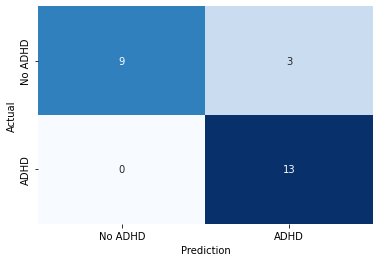

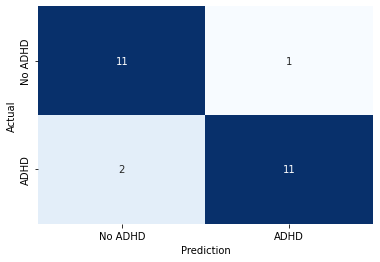

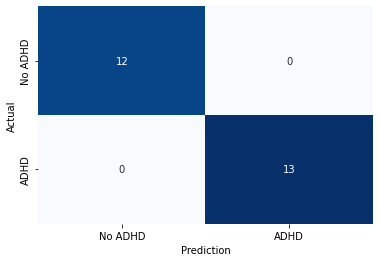

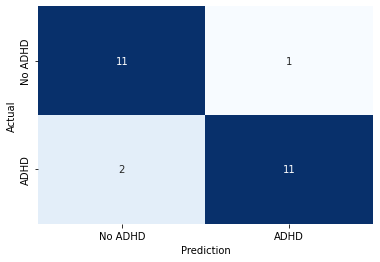

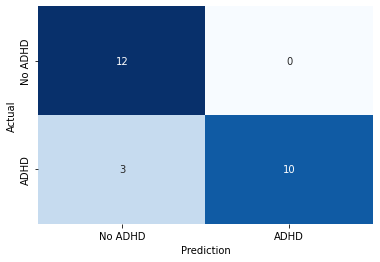

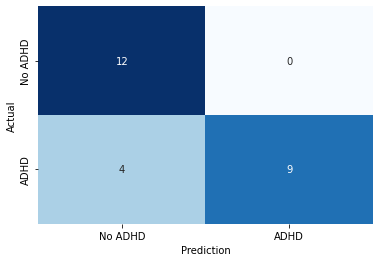

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import load_model
import matplotlib.pyplot as plt

for i in range(7):
  y_test_pred=load_model(f'./mod{i}.h5')
  y_test_pred=y_test_pred.predict(x_test)

  y_pred=y_test_pred.flatten()

  y_test_pred=np.where(y_pred<0.5, 0,1)

  c_matrix=confusion_matrix(y_test,y_test_pred)
  ax=sns.heatmap(c_matrix,annot=True, xticklabels=['No ADHD','ADHD'],yticklabels=['No ADHD','ADHD'],cbar=False,cmap='Blues')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Actual')
  plt.show()